<h2>Step 1: Notebook Set-up<h2> 

In [12]:
# This is just a little piece of code to increase the width of the cells in the notebook.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

<h2>Step 2: Define Your Business Question</h2>
<h4>What defines success? What are you trying to do?</h4>
<p>For today's tutorial, we are going to use the <b><a href=https://datacatalog.worldbank.org/dataset/world-development-indicators>World Development Indicators dataset</a></b>, which presents "the most current and accurate global development data available, and includes national, regional, and global estimates."</p>
<br>
<p>While there are many questions we could answer with this data, today we are going to focus on one question in particular. How hard is it to start a business in different countries?</p>
<br>
<p>That's a pretty vague question, so let's try to refine it further. It costs time and money to start a business, and those two variables are almost certainly correlated. Other factors that may affect the ability to start a business include the regulatory environment and the general level of prosperity in the country. To be specific, let's try to <b>predict the cost of starting a business</b> in countries around the world, given some information about that country.</p>
<br>
<p>This is a problem that is an example of supervised learning: using a data set that contains <b>training examples</b> and their associated correct <b>labels</b> to train a learning algorithm. When the training process is finished, we will have a learned function that can be used to estimate the cost of starting a business for <b>unlabeled test data</b>. E.g. Would it cost more, or less, to start a business if the gross national product in my country went up?</p>
 <br>
<p>Today's tutorial is on a classic regression problem. We are predicting a <b>continuous target variable</b> (cost to start a business) based on <b>input features</b> (regulatory environment, number of people). </p>

<h2>Step 3: Collect Your Data</h2>
<p>Here we are importing data from CSV files into <b>Pandas dataframes</b>.</p>
<p>"Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language."</p>
<p><a href:https://pandas.pydata.org/>Pandas documentation</a></p>

In [3]:
data_dir = '.'

In [4]:
business_data_file = 'CombinedStartupCellularData.csv'
country_data_file = 'CountryDimData.csv'
regional_cellular_data_file = 'RegionalCellularData.csv'
country_cellular_data_file = 'CountryCellularData.csv'

In [5]:
business_df = pd.read_csv(os.path.join(data_dir, business_data_file))
country_df = pd.read_csv(os.path.join(data_dir, country_data_file))
r_cellular_df = pd.read_csv(os.path.join(data_dir, regional_cellular_data_file))
c_cellular_df = pd.read_csv(os.path.join(data_dir, country_cellular_data_file))

<h3>A Little About These Data</h3>
<p>These are prepared data files, similar to those created during the "Data Engineering" tutorial.
<ul>
    <li>business_df (by country): startup cost, startup time, ease of business, population, broadband subscriptions, cell subscriptions, percentage of population over age 65, GNI per capita
    <li>country_df (by country): name, region, and income group for each country
    <li>r_cellular_df (by region and year): population and number of broadband and cellular subscriptions
    <li>c_cellular_df (by country and year): population and number of broadband and cellular subscriptions
</ul>
<p><b>Exercise:</b> Look at the head of each of the four dataframes.

In [8]:
business_df.head()

,country_name,startup_cost_pct_gni_per_capita,startup_time_days,num_startup_procedures,ease_of_business,population,broadband_subscriptions,cellular_subscriptions,percentage_pop_age_65_and_above,gni_per_capita
0,Benin,3.80,8.50,6.00,151.0,10872298.0,22285.0,8892490.0,0.032357,822.170209
1,Euro area,3.83,9.55,5.26,NaN,340762347.0,117730706.0,418111175.0,0.202031,36132.513197
2,Kazakhstan,0.30,9.00,5.00,36.0,17794397.0,2349900.0,25534800.0,0.068402,8812.436859
3,Jamaica,4.30,10.00,2.00,70.0,2881355.0,286068.0,3267344.0,0.094971,4633.075113
4,Norway,0.90,4.00,4.00,8.0,5236151.0,2120360.0,5729569.0,0.165924,81983.120808


<h2>Step 4: Data Exploration</h2>
<p>The beginning of any data science project - take a look at your data. Pay attention to missing values, categorical vs. continuous variables, data size. Your analysis or model will only ever be as good as the data that goes into it. 

<h4>How big is the data?</h4>
<p><b>Exercise:</b> Look at the sizes of each dataframe

In [9]:
business_df.shape
# c_cellular_df.shape

(221, 10)

<h4>What does it look like?</h4>

In [10]:
c_cellular_df.sample(10)

,country_iso_code,country_name,year,population,population_age_0_to_14,population_age_15_64,population_age_65_and_above,broadband_subscriptions,cellular_subscriptions
11895,TL,Timor-Leste,1983,6.246480e+05,2.470280e+05,3.658950e+05,11725.0,NaN,NaN
4292,GE,Georgia,1977,4.372100e+06,1.180305e+06,2.806487e+06,385308.0,NaN,0.0
6300,KP,Dem. People's Rep. Korea,1990,2.029305e+07,5.504750e+06,1.390775e+07,880553.0,NaN,0.0
6802,LK,Sri Lanka,1979,1.478861e+07,5.364032e+06,8.791066e+06,633509.0,NaN,0.0
7618,MK,Macedonia,1997,1.999599e+06,4.849460e+05,1.330806e+06,183847.0,NaN,12362.0
2195,CD,Dem. Rep. Congo,1989,3.346544e+07,1.509071e+07,1.738735e+07,987375.0,NaN,0.0
13439,XF,IBRD only,1988,3.354132e+09,1.141478e+09,2.042402e+09,170187069.0,NaN,73773.0
13546,XH,IDA blend,1981,2.174848e+08,9.532465e+07,1.144255e+08,7659360.0,NaN,0.0
9137,PE,Peru,1977,1.606132e+07,6.932397e+06,8.548582e+06,580344.0,NaN,0.0
2536,CM,Cameroon,1988,1.103182e+07,5.102123e+06,5.533294e+06,396400.0,NaN,0.0


<h4>How is the data distributed?</h4>

In [11]:
business_df.describe()

,startup_cost_pct_gni_per_capita,startup_time_days,num_startup_procedures,ease_of_business,population,broadband_subscriptions,cellular_subscriptions,percentage_pop_age_65_and_above,gni_per_capita
count,221.000000,221.000000,221.000000,177.000000,2.210000e+02,2.150000e+02,2.180000e+02,216.000000,221.000000
mean,23.491448,20.167104,7.036380,92.994350,3.558801e+08,3.992014e+07,3.560604e+08,0.085729,11970.982776
std,31.605901,18.971095,2.705391,53.836716,1.027083e+09,1.227757e+08,1.030418e+09,0.059014,16271.053315
min,0.000000,0.500000,1.000000,1.000000,2.150300e+04,6.600000e+01,2.341200e+04,0.010842,277.882036
25%,3.800000,8.500000,5.000000,46.000000,3.516816e+06,6.170000e+04,3.730392e+06,0.035593,1715.000227
50%,13.640000,15.000000,7.000000,95.000000,1.445254e+07,9.818860e+05,1.294002e+07,0.065674,4938.367962
75%,32.400000,25.520000,8.130000,139.000000,9.568868e+07,7.225526e+06,1.126819e+08,0.134719,12759.521499
max,219.300000,149.000000,17.000000,186.000000,7.444027e+09,9.202980e+08,7.508994e+09,0.265646,82093.895750


<h4>Are there nulls in the data?</h4>
<p><b>Exercise</b>: How many nulls are in the country and cellular data sets? What are they?</p>

In [11]:
business_df.isna().sum()

country_name                        0
startup_cost_pct_gni_per_capita     0
startup_time_days                   0
num_startup_procedures              0
ease_of_business                   44
population                          0
broadband_subscriptions             6
cellular_subscriptions              3
percentage_pop_age_65_and_above     5
gni_per_capita                      0
dtype: int64

<h4>If there are nulls, what countries do they affect?</h4>

In [10]:
business_df[business_df['ease_of_business'].isnull() == True].sample(10)

,country_name,startup_cost_pct_gni_per_capita,startup_time_days,num_startup_procedures,ease_of_business,population,broadband_subscriptions,cellular_subscriptions,percentage_pop_age_65_and_above,gni_per_capita
142,Latin America & Caribbean (excluding high income),38.08,37.02,8.84,NaN,6.101364e+08,6.643631e+07,6.557410e+08,0.076355,7955.467046
26,Lower middle income,26.21,21.16,7.74,NaN,3.014788e+09,6.884116e+07,2.834068e+09,0.053199,2077.419546
219,North America,0.75,3.55,4.00,NaN,3.594575e+08,1.197144e+08,4.266330e+08,0.151842,55551.770067
145,Middle East & North Africa (excluding high inc...,34.28,21.65,8.23,NaN,3.737191e+08,2.225726e+07,3.675625e+08,0.050189,4042.261104
131,Europe & Central Asia (IDA & IBRD),5.10,12.28,5.27,NaN,4.553767e+08,7.230686e+07,5.779285e+08,0.119507,8109.901224
166,Pre-demographic dividend,63.21,24.93,7.68,NaN,8.792925e+08,3.038889e+06,5.986018e+08,0.028399,1468.874202
53,IDA total,48.35,22.05,7.22,NaN,1.574353e+09,1.830697e+07,1.155224e+09,0.036067,1304.186800
54,OECD members,4.14,8.46,5.06,NaN,1.289873e+09,3.876639e+08,1.513135e+09,0.164997,37297.326160
215,World,26.01,21.31,7.13,NaN,7.444027e+09,9.202980e+08,7.508994e+09,0.084784,10321.093362
31,South Asia (IDA & IBRD),13.64,15.81,8.13,NaN,1.766394e+09,2.805948e+07,1.481311e+09,0.055757,1610.767734


<h2>Step 5: Dealing with missing values</h2>
<p>Most data sets will have missing values. How you decide to impute those values (or whether you choose to drop those rows) can make a big difference in your results.
<p>Two simple ways to impute data are shown in the cell below. In the first, we fill in all missing values with zero. In the second, we fill in all missing values with the mean of the other values in that column.
<p><b>Discussion:</b> What are the effects of filling with zero vs. filling with the mean? Is there a "smarter" way to impute missing data?
<p><b>Exercise:</b> Try this with one of the cellular data sets.

In [12]:
business_df_fill_zero = business_df.fillna(0)
business_df_fill_mean = business_df.fillna(business_df.mean())

<h4>Impute with mean by income group.</h4>
<p>Here we use the country data (country_df) to do a "smart" mean where missing values get filled by the mean for countries in the same income group.</p>
<p><b>Note:</b> This section uses a lot of Pandas functions and the syntax isn't straightforward if you are relatively new to Pandas. If you don't understand what's happening in these cells, that's okay. Simply run them and circle back to understanding them alter.</p>
<p><b>Exercise:</b> Try to walk through each step and make sure you understand what's happening.

In [13]:
# Get the column names for the business dataframe
original_columns = business_df.columns

In [14]:
# Create a combined data frame that includes the business data, as well as the income group for each country
df_join = pd.merge(business_df, country_df[['country_name', 'income_group']], on='country_name')

In [15]:
# Group by the income group, then take the mean. We reset the index for ease of use.
df_grouped = df_join.groupby('income_group').mean().reset_index()

In [16]:
df_grouped.head()

,income_group,startup_cost_pct_gni_per_capita,startup_time_days,num_startup_procedures,ease_of_business,population,broadband_subscriptions,cellular_subscriptions,percentage_pop_age_65_and_above,gni_per_capita
0,High income,4.666667,11.484314,5.666667,45.176471,2.265547e+07,7.466308e+06,2.887302e+07,0.153116,33635.026292
1,Low income,65.003704,22.055556,7.296296,150.222222,2.231114e+07,1.311646e+05,1.358385e+07,0.030172,602.709826
2,Lower middle income,24.098000,21.476000,7.780000,115.020000,5.990290e+07,1.412501e+06,5.755416e+07,0.051151,2412.522264
3,Upper middle income,15.072917,25.904167,7.312500,88.166667,5.168927e+07,9.741837e+06,5.731723e+07,0.086168,6933.815347


In [17]:
# Rename the columns of the grouped data frame for clarity. (They will ordinarily have the same names as the ungrouped dataframe and that would be confusing.)
df_grouped.columns = ['income_group', 'mean_startup_cost_pct_gni', 'mean_startup_time', 'mean_startup_procedures', 'mean_ease_of_business', 'mean_population', 'mean_broadband_subscriptions', 'mean_cellular_subscriptions', \
                      'mean_percentage_pop_age_65_and_above', 'mean_gni_per_capita']

In [18]:
# Join the grouped data frame back to our business+country dataframe.
df_join2 = pd.merge(df_join, df_grouped, on='income_group')

In [19]:
# Finally, fill in the missing values with the mean calculated by income group.
df_join2['ease_of_business'].fillna(df_join2['mean_ease_of_business'], inplace=True)
df_join2['broadband_subscriptions'].fillna(df_join2['mean_broadband_subscriptions'], inplace=True)
df_join2['cellular_subscriptions'].fillna(df_join2['mean_cellular_subscriptions'], inplace=True)
df_join2['percentage_pop_age_65_and_above'].fillna(df_join2['mean_percentage_pop_age_65_and_above'], inplace=True)


In [20]:
business_df_fill_smart = df_join2[original_columns]
business_df_fill_smart.fillna(business_df_fill_smart.mean(), inplace=True)

/usr/local/lib/python3.6/site-packages/pandas/core/generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
business_df_fill_mean.sample(5)

,country_name,startup_cost_pct_gni_per_capita,startup_time_days,num_startup_procedures,ease_of_business,population,broadband_subscriptions,cellular_subscriptions,percentage_pop_age_65_and_above,gni_per_capita
197,Morocco,7.9,10.0,5.0,69.0,35276786.0,1255428.0,41513933.0,0.065559,2925.663353
178,South Africa,0.2,45.0,7.0,82.0,56015473.0,1150770.0,82412880.0,0.052093,5479.539555
171,Colombia,14.1,11.0,8.0,59.0,48653419.0,5912968.0,58684924.0,0.073331,6314.129743
169,Iceland,2.0,11.5,5.0,23.0,335439.0,128023.0,401613.0,0.140753,56758.698416
41,Hungary,7.1,7.0,6.0,48.0,9814023.0,2814524.0,11779908.0,0.180117,12570.380159


<h2>Step 6: Pair Plots: Useful technique to understand your variables</h2>
<p>We've spent a lot of time looking at tables of our data, but sometimes the best and easiest way to understand our data is simply to look at it. Here we use pair-plots to quickly understand the underlying data.
<p><b>What is a pair plot? (aka scatterplot matrix)</b></p>
<p>A bunch plots showing each variable in the data set plotted against every other variable in the data set. Usually a histogram of the variable runs down the diagonal.</p>
<p><a href=https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166>A useful blog post.</a>
<p><b>Exercise:</b> Identify, by eye, variables that are colinear. Which do you think are the most predictive?
<p><b>Exercise:</b> Try this scatter plot with business_df_fill_zero, business_df_fill_smart where the variables have been filled in different ways.

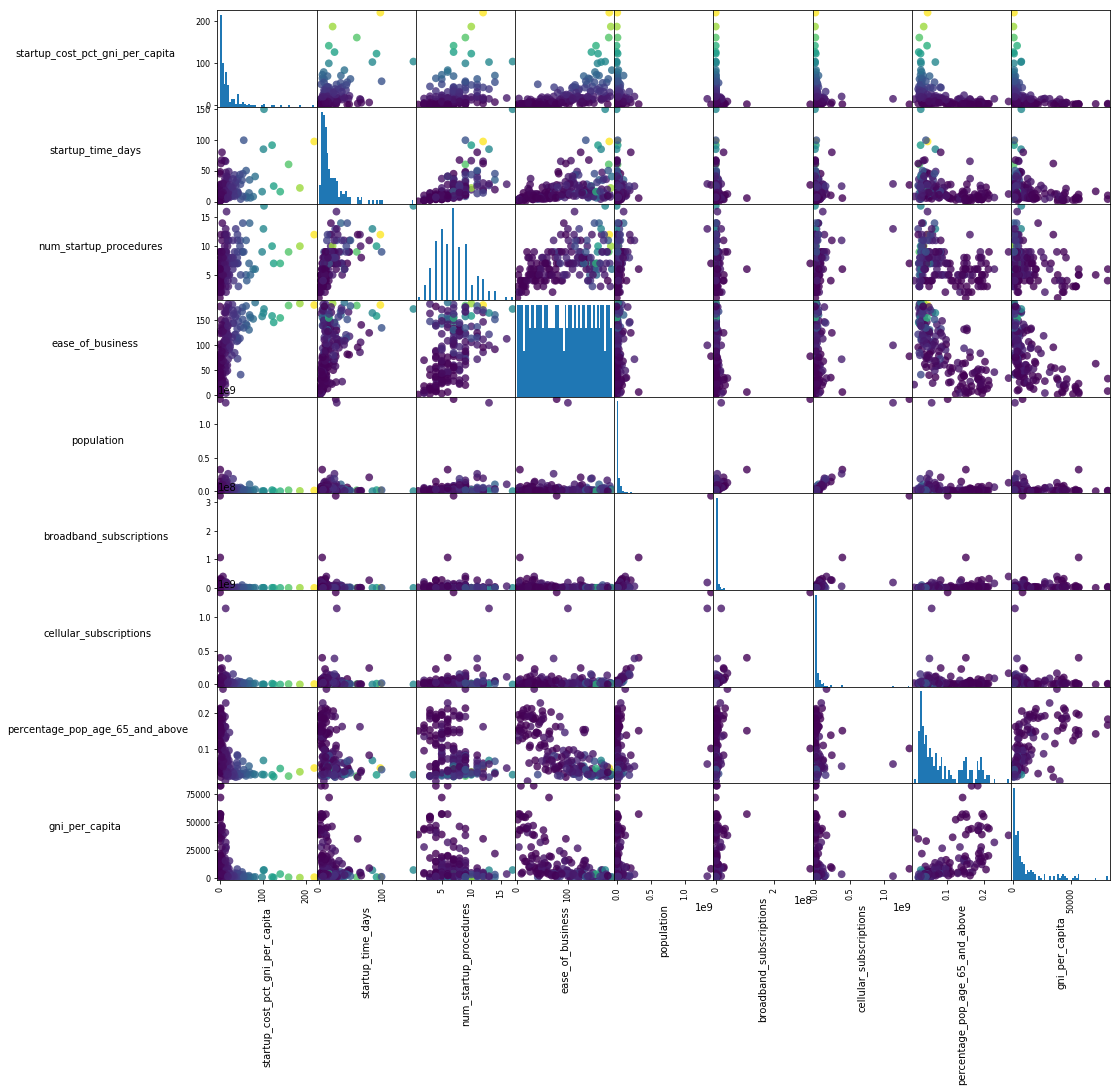

In [22]:
# create a scatter matrix from the dataframe, color by y_train
Y = np.array(business_df_fill_smart['startup_cost_pct_gni_per_capita'])
grr = pd.plotting.scatter_matrix(business_df_fill_smart.drop(['country_name'], axis=1), c=Y,figsize=(16, 16), marker='o',
                                 hist_kwds={'bins': 50}, s=60, alpha=.8)
n = len(business_df_fill_smart.columns)-1
for x in range(n):
    for y in range(n):
        # to get the axis of subplots
        ax = grr[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 100

<h2>Step 7: Get a Baseline Result</h2>
<p>We've looked at our data and filled in missing values. We've decided on a target variable (Startup Cost as a Percentage of GNI). Now it's time to get to building our predictive models.</p>
<p>It's often a good idea to try a simple model(e.g. linear or logistic regression) as your first step, as it's possible that you don't need anything fancier. If you do, benchmarking against the linear regression can be a useful measure.</p>
<br><p><b>Linear regression</b>, also known as ordinary least squares or "drawing the best fit line" is a parametric method, meaning that we assume a form for the function that relates our input features to our target variable.</p>
<p><tt>y = M*x+b</tt></p>
<br>
<p><b>Exercise:</b> Try the linear model and random forest model with one of the other data sets.

<h4>Step 7a: Train/test/validation</h4>
<p>We need to split our data set into <b>training</b> and <b>testing</b> sets. The training set will be used to train the model, while the testing set will be used to get an accurate representation of how well the model predicts data it has never seen before. This is done to prevent <b><a href=https://en.wikipedia.org/wiki/Overfitting>overfitting</a></b>.</p>

In [23]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test

In [24]:
# Note that this fuction includes the ability to split into training, testing, and validation sets. Here we will ignore the validation set and set that percentage to zero.
train, validate, test = train_validate_test_split(business_df_fill_mean, train_percent=0.8,validate_percent = 0)

In [25]:
print('There are '+ str(len(train)) + ' data points in the training set.')
print('There are '+ str(len(test)) + ' data points in the testing set.')

There are 176 data points in the training set.
There are 45 data points in the testing set.


In [26]:
train.head()

,country_name,startup_cost_pct_gni_per_capita,startup_time_days,num_startup_procedures,ease_of_business,population,broadband_subscriptions,cellular_subscriptions,percentage_pop_age_65_and_above,gni_per_capita
6,Antigua and Barbuda,9.40,22.00,9.00,107.00000,100963.0,9261.0,1.800000e+05,0.067282,13563.786367
39,El Salvador,41.40,16.50,9.00,73.00000,6344722.0,395307.0,9.637259e+06,0.080989,3916.542552
33,St. Vincent and the Grenadines,16.10,10.00,7.00,129.00000,109643.0,21865.0,1.126490e+05,0.075226,6774.609151
83,Europe & Central Asia,4.09,10.09,5.22,92.99435,911847278.0,233204115.0,1.135886e+09,0.158467,23167.805081
95,Tanzania,48.10,28.00,11.00,137.00000,55572201.0,1848167.0,4.004419e+07,0.031109,872.892745


<h4>Step 7b: Set-up the data for training and evaluation.</h4>
<p>We need to split out our target variable (y) and transform our dataframes into matrices.</p>

In [27]:
y = np.array(train['startup_cost_pct_gni_per_capita'])
X = np.array(train.drop(['country_name', 'startup_cost_pct_gni_per_capita'], axis=1))
y_test = np.array(test['startup_cost_pct_gni_per_capita'])
X_test = np.array(test.drop(['country_name', 'startup_cost_pct_gni_per_capita'], axis=1))

<h2>Step 8: Linear Regression</h2>
<p>Now, in suprisingly few lines, we can create and train/fit our linear regression. We also get the predictions of the fitted model on the test set, to compare against the known (correct) labels.</p>

In [28]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X,y)
y_pred = reg.predict(X)
y_test_pred = reg.predict(X_test) #Look at the test set (holdout)

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


<h2>Step 9: Look at the Regression Coefficients</h2>
<p>One of the advantages of linear regression is that the coefficients learned by the model are extremely interpretable and have a clear meaning. Here, we map the learned coefficients back to their column names and take a look at the results.</p>

In [29]:
# input_feature_names = ['Startup Time', 'Startup Procedures', 'GNI', 'GDP Per Capita', 'Business Regulation', 'Ease of business']
input_feature_names = train.drop(['country_name', 'startup_cost_pct_gni_per_capita'], axis=1).columns

coef_dict = {input_feature_names[i]: reg.coef_[i] for i in range(0, len(input_feature_names))}

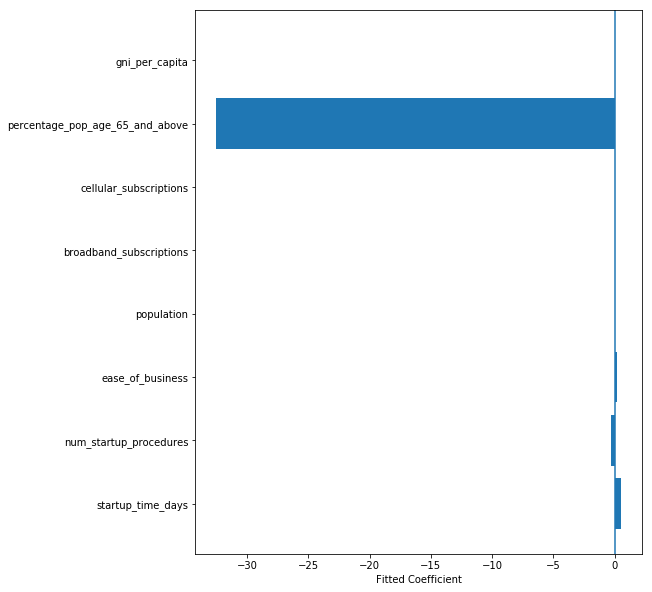

In [30]:
plt.figure(figsize=(8,10))
plt.barh(range(len(coef_dict)), list(coef_dict.values()), align='center', tick_label=list(coef_dict.keys()))
plt.xlabel('Fitted Coefficient')
plt.axvline(x=0)

<h2>Step 10: Model Error </h2>
<p>Here we look at the model error in two ways. In the first, we do a visual examination of the model's predictions on both the training and test sets and compare them the actual values. If the model were absolutely perfect, every point in these plots would lie along the <tt>x=y</tt> line.</p>
<p>The second method of examinining the model error is via the RMSE (root mean squared error).</p>
<p>Add sentence here about what the error is.</p>
<p>Examples: Predicting home prices. Stock market prediction. Content demand prediction.</p>

Text(0.5,1,'Test Set')

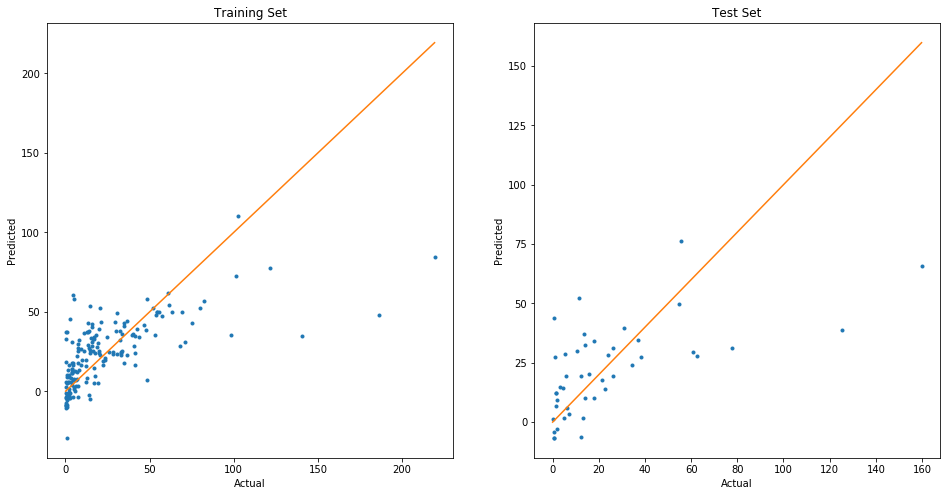

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(y, y_pred, '.')
plt.plot([min(y), max(y)], [min(y), max(y)])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set')

plt.subplot(1,2,2)
plt.plot(y_test, y_test_pred, '.')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set')

In [32]:
from sklearn.metrics import mean_squared_error
print('Root mean squared error for training set: ' + str(round(np.sqrt(mean_squared_error(y, y_pred)))))
print('Root mean squared error for test set: ' + str(round(np.sqrt(mean_squared_error(y_test, y_test_pred)))))

Root mean squared error for training set: 24.0
Root mean squared error for test set: 26.0


<h2>Step 11: Iterate and Experiment on Your Model</h2>
<p>Now we can move on to trying other ML techniques and see if our predictions improve. Here we are trying the random forest algorithm, a nonparametric approach that uses ensembles of decision trees to make predictions. They tend to be a common "go-to" technique for supervised ML problems, since they are robust to data that hasn't been standardized or that isn't super-clean.</p>
<p>Scikit-learn (and other associated ML packages) make trying various algorithms extremely easy. However, throwing the kitchen sink at your problem will often result in "gotchas". That is, just trying every algorithm and picking the best one is not the right thing to do. Think about what algorithm suits your problem and your data.</p>

<h4>Random Forest</h4>

In [33]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(random_state=0)
rf_reg.fit(X,y)
y_pred_rf = rf_reg.predict(X)
y_test_pred_rf = rf_reg.predict(X_test)

<h2>Step 12: Look at feature importances</h2>
<p>Feature importances are calculated in tree-based models. It's useful to look at them to see which of our features are most relevant/helpful to the model.</p>

In [34]:
input_feature_names = train.drop(['country_name', 'startup_cost_pct_gni_per_capita'], axis=1).columns
fe_dict = {input_feature_names[i]: rf_reg.feature_importances_[i] for i in range(0, len(input_feature_names))}

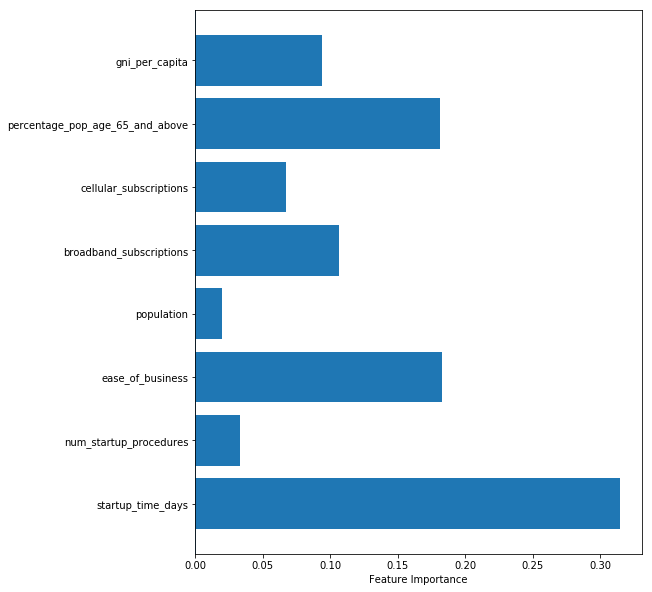

In [35]:
plt.figure(figsize=(8,10))
plt.barh(range(len(fe_dict)), list(fe_dict.values()), align='center', tick_label=list(coef_dict.keys()))
plt.xlabel('Feature Importance')
plt.axvline(x=0)

<h2>Step 13: Model Error</h2>
<p>It will be instructive to compare the model error from the random forest model to the model error from the linear regression. In particular, check whether the training and test errors are both improving. If the training error is improving, but the test error is not, you may be overfitting.</p>

Text(0.5,1,'Test Set')

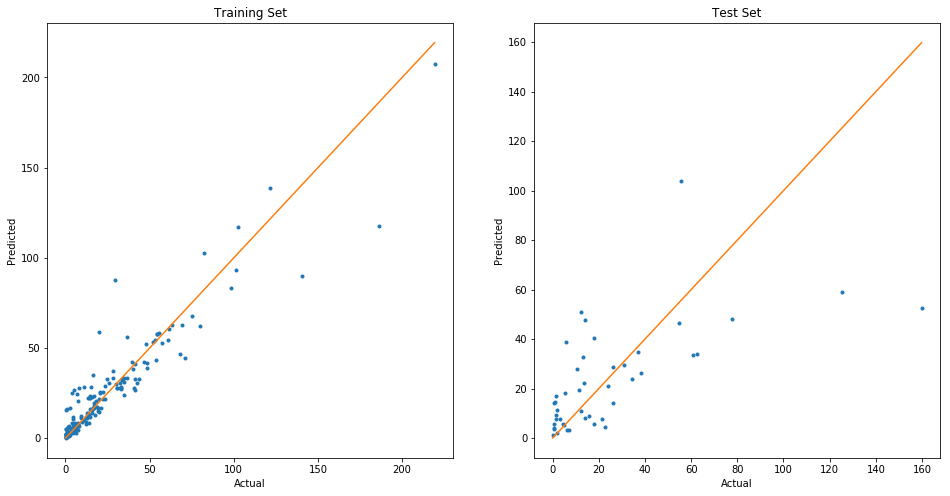

In [36]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(y, y_pred_rf, '.')
plt.plot([min(y), max(y)], [min(y), max(y)])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Training Set')

plt.subplot(1,2,2)
plt.plot(y_test, y_test_pred_rf, '.')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Set')

In [37]:
print('Root mean squared error for training set: ' + str(round(np.sqrt(mean_squared_error(y, y_pred_rf)))))
print('Root mean squared error for test set: ' + str(round(np.sqrt(mean_squared_error(y_test, y_test_pred_rf)))))

Root mean squared error for training set: 11.0
Root mean squared error for test set: 25.0
